# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

Companies like Glassdoor and Paysa are popping up which give potential employees and recruiters access to all sorts of information regarding the profile of a company. These companies provide information ranging from reviews, to jobs and also salaries for said jobs that a given company might have posted. 

Since not all employees are not willing to share how much they really make and those that do, do so because of anonymity, we are unable to really see what companies pay with regards to the jobs they hire for. 

The problem that arises now is missing data regarding salaries though we do have some insight as to what companies hire for. 

We can tackle this problem by using Machine Learning and the power of prediction that comes with Machine Learning to estimate salaries for the jobs we dont have any salary data for.

In [38]:
#import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style="dark")

__author__ = "Divyam Balani"
__email__ = "divyambalani@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [39]:
#load the data into a Pandas dataframe
path_train = '../data/external/train_features.csv'
path_test = '../data/external/test_features.csv'
path_salaries = '../data/external/train_salaries.csv'

training_data = pd.read_csv(path_train)
test_data = pd.read_csv(path_test)
salaries_data = pd.read_csv(path_salaries)

### ---- 3 Clean the data ----

#### look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

In [40]:
#
training_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [41]:
test_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [42]:
salaries_data.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [43]:
data = pd.merge(training_data,salaries_data, how='inner', on='jobId')
data.head()
#print(salaries_data.shape,training_data.shape)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [44]:
numerical_features = data.select_dtypes(exclude='object')
cat_features = data.select_dtypes(exclude=['int64','float64'])
#cat_features.head()


In [45]:
print(data.duplicated().sum(),test_data.duplicated().sum())
data.head()

0 0


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [46]:
numerical_features.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [47]:
from pandas.plotting import scatter_matrix
data.corr()

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000673,0.375013
milesFromMetropolis,0.000673,1.000000,-0.297666
salary,0.375013,-0.297666,1.000000


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


### ---- 4 Explore the data (EDA) ----

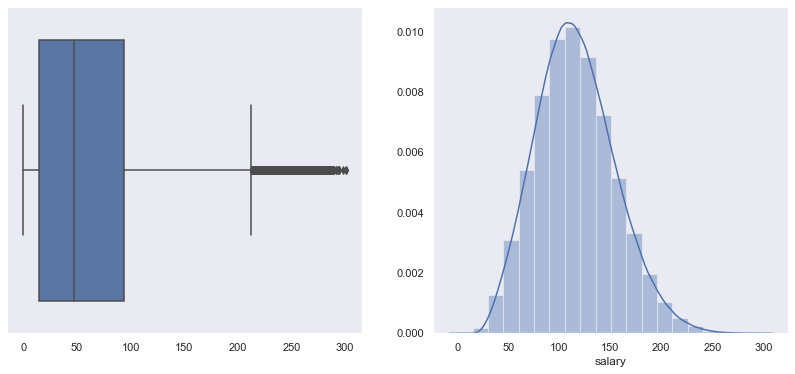

<Figure size 432x288 with 0 Axes>

In [49]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(numerical_features)
plt.subplot(1,2,2)
sns.distplot(data.salary,bins=20)
plt.show()
plt.savefig('../reports/figures/salary_dist_boxplot.png')

In [50]:
#import pandas_profiling
#data.profile_report(style={'full_width':True})
#pandas profiling for quick EDA

stat = data.salary.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5*IQR
lower = stat['25%'] - 1.5*IQR
print(f'the upper and lower bounds for outliers are {upper} & {lower}')

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
the upper and lower bounds for outliers are 220.5 & 8.5


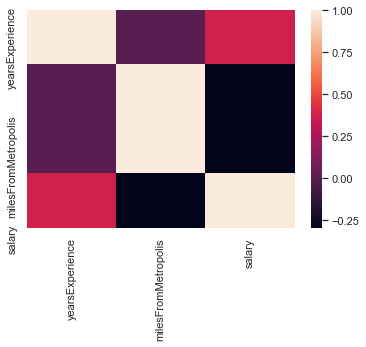

In [51]:
sns.heatmap(data.corr())
plt.savefig('../reports/figures/corr_heatmap.png')

In [52]:
outliers = data[(data['salary']>=220.5)&(data['jobType']=='JUNIOR')]
outliers = pd.DataFrame(outliers)
grouped = pd.DataFrame(outliers.groupby('jobType').industry.value_counts())
grouped

industry
jobType industry          
JUNIOR  OIL             11
        FINANCE          8
        WEB              1

Marking these entries as Legit because they are in well established fields that tend to pay well as well as degrees are masters and above. #make this more clean and improve readability

In [53]:
data[(data['salary']<=8.5)]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


These look like they are not positions that someone would volunteer for and has missing data for salary so will remove these.

In [54]:
#removing corrupt data from salaries
data = data[data['salary']> 8.5]

In [55]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features
#clean it up and make it legible
def plot_features(df, col):
    """plots features with target, left has dist, right has correlation"""
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels,inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)
    
    if df[col].dtype == 'int64' or col == 'companyId':
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)),mean.values-std.values,mean.values+std.values,alpha=0.1)
    else:
        sns.boxplot(x=col, y='salary', data=df)
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.show()   

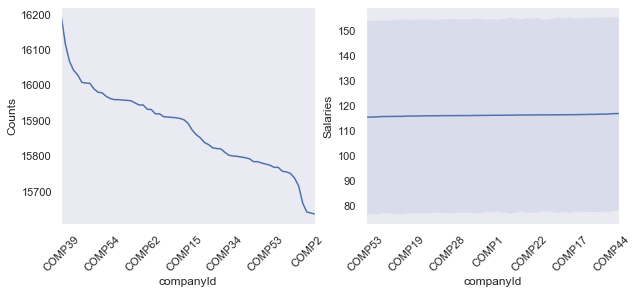

None


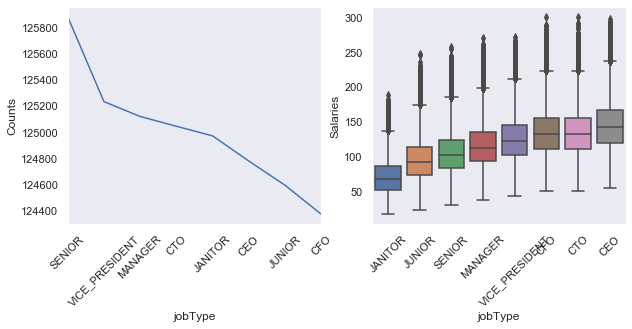

None


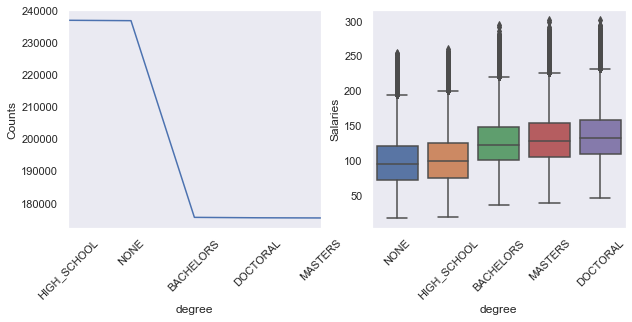

None


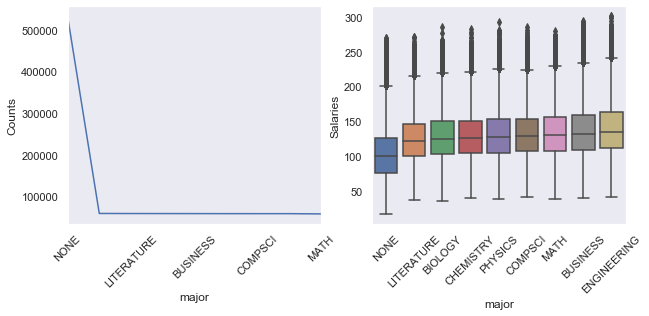

None


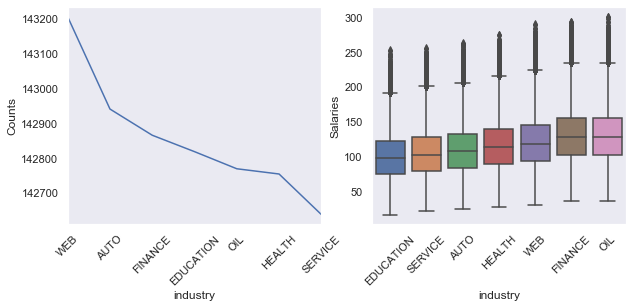

None


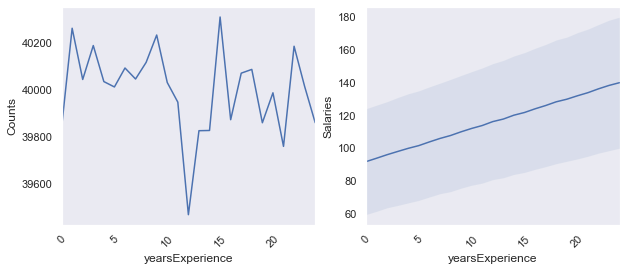

None


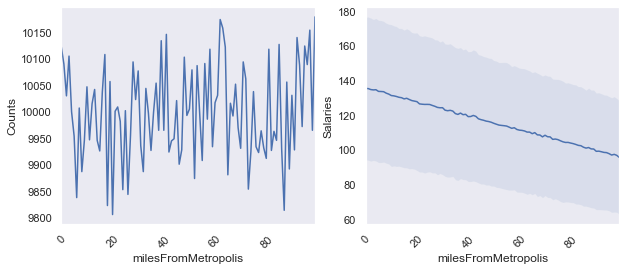

None


In [56]:
columns = data.columns
columns = ['companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis']
for col in columns:
    print(plot_features(data,col))

Insights...
- salaries are weakly correlated to companyId
- salaries are higher for upper exec level jobs
- salaries are higher for higher levels of degrees obtained by students
- salaries are positively correlated with years of experience
- salaries are negatively correlated with distance from the center of a metropolis, so the more in suburbs you go the lower the salaries

In [57]:
def encode_label(df, col):
    #encode the categories using average salary for each category to replace label
    cat_dict = {}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = data[data[col] == cat]['salary'].mean()   
    df[col] = df[col].map(cat_dict)

In [64]:
data.dtypes
data_2 = data

In [65]:
for col in columns:
    if data[col].dtype.name == 'category':
        encode_label(data_2,col)

In [83]:
data_2.head()
data_2 = data_2.drop('jobId',axis=1).astype('int64')

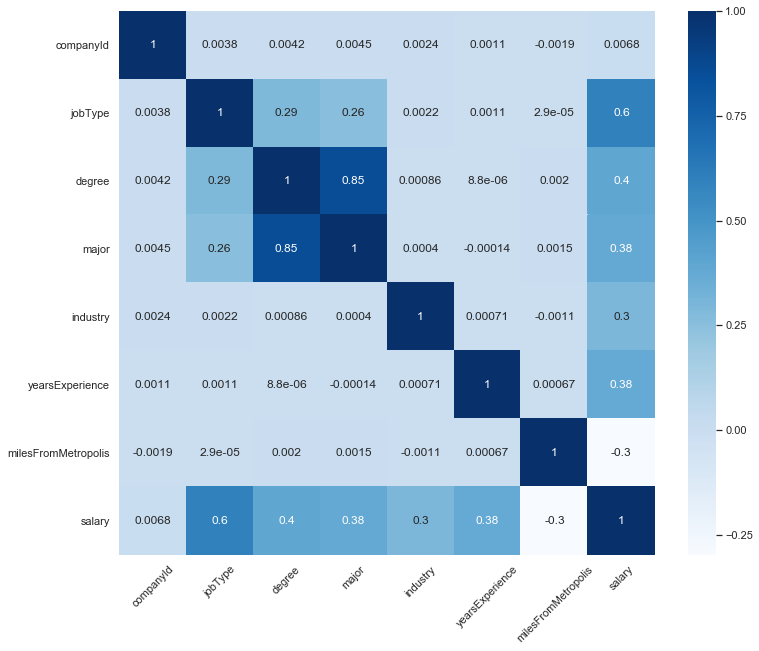

In [85]:
# Correlations between selected features and response
# jobId is discarded because it is unique for individual
fig = plt.figure(figsize=(12, 10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis','salary']
ax = sns.heatmap(data_2.corr(), cmap='Blues', annot=True,xticklabels=features, yticklabels=features)
plt.xticks(rotation=45)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig('../reports/figures/corr_heatmap_2.png')
plt.show()

We see that The type of Job a person has is the most important factor in determining the salary followed by the degree then major and years of experience are tied at .38 on a scale of -1 to 1 coefficient where 1 is the strongest and 0 means no correlation at all.